# 영상입력 이진분류모델 레시피
영상을 입력해서 이진분류할 수 있는 모델들에 대하여 알아보겠다.<br>
숫자 손글씨 데이터셋인 MNIST을 이용하여 홀수/짝수를 구분을 위한 데이터셋을 생성해보고, 다층퍼셉트론 및 컨볼루션 신경망 모델을 구성하고 학습시켜보겠다.<br>
이 모델은 임의의 영상으로부터 A와 B를 구분하는 문제나 양성과 음성을 구분하는 문제를 풀 수 있다.<br>
예제<br>
- 입력된 얼굴 사진에 남자인지 여자인지 구분
- 촬영된 부품 사진이 정상인지 불량인지 구분
- 의료영상을 보고 질병유무 판독

### 1. 데이터셋 준비
케라스 함수에서 제공하는 숫자 손글씨 데이터셋이 MNIST을 이용하겠다.<br>
초기 라벨값은 0에서 9까지 정수로 지정한다.<br>
데이터 정규화를 위해서 255.0으로 나눈다.<br>
아래는 다층퍼셉트론 신경망 모델에 입력하기 위해 데이터셋 생성하는 코드이다.

In [3]:
from keras.datasets import mnist

width = 28
height = 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

컨볼루션 신경망 모델에 입력하기 위해 데이터셋을 생성하는 코드<br>
샘플수 너비 높이 채널수로 총 4차원 배열로 구성되어있다.<br>

    x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
    x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0 

불러온 훈련셋을 다시 훈련셋 50000개와 검증셋 50000개로 나누었다.

In [4]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

라벨값은 다중클래스 분류로 0에서 9까지 지정되어 있으나 이것을 홀수/짝수로 바꾸어서 이진분류 라벨로 지정하겠다.<br>
1은 홀수를 의미하고 0은 짝수를 의미한다.

In [5]:
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

만든 데이터 일부를 가시화 해보았다.

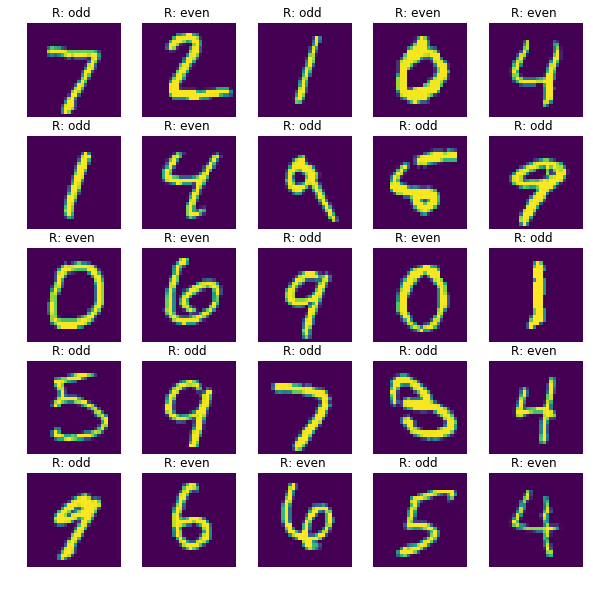

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
    
    sub_plt.set_title(sub_plt_title)

plt.show()

### 2. 레이어 준비
- Dropout
과적합을 방지하기 위해서 학습 시에 지정된 비율만큼 임의의 입력 뉴런(1차원 or 2차원)을 제외시킨다.(사진 참고)<br>
<br>

### 3. 모델 준비
영상을 입력하여 이진분류를 하기 위해 다층퍼셉트론 신경망 모델, 컨볼루션 신경망 모델, 깊은 컨볼루션 신경망 모델을 준비하였다.<br>

- 다층퍼셉트론 신경망 모델
    
      model = Sequential()
      model.add(Dense(256, input_dim=width*height, activation='relu'))
      model.add(Dense(256, activation='relu'))
      model.add(Dense(256, activation='relu'))
      model.add(Dense(1, activation='sigmoid'))
<br>    
- 컨볼루션 신경망 모델

      model = Sequential()
      model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Conv2D(32, (3, 3), activation='relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Flatten())
      model.add(Dense(256, activation='relu'))
      model.add(Dense(1, activation='sigmoid'))
<br>        
- 깊은 컨볼루션 신경망 모델

      model = Sequential()
      model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
      model.add(Conv2D(32, (3, 3), activation='relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))
      model.add(Conv2D(64, (3, 3), activation='relu'))
      model.add(Conv2D(64, (3, 3), activation='relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))
      model.add(Flatten())
      model.add(Dense(256, activation='relu'))
      model.add(Dropout(0.5))
      model.add(Dense(1, activation='sigmoid'))
      
      
### 4. 전체 소스

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/30





50000/50000 [==============================] - 6s 118us/step - loss: 0.2919 - acc: 0.8833 - val_loss: 0.1536 - val_acc: 0.9449
Epoch 2/30
50000/50000 [==============================] - 4s 76us/step - loss: 0.1284 - acc: 0.9550 - val_loss: 0.0986 - val_acc: 0.9666
Epoch 3/30
50000/50000 [==============================] - 4s 81us/step - loss: 0.0893 - acc: 0.9691 - val_loss: 0.0780 - val_acc: 0.9738
Epoch 4/30
50000/50000 [==============================] - 3s 67us/step - loss: 0.0706 - acc: 0.9755 - val_loss: 0.0694 - val_acc: 0.9774
Epoch 5/30
50000/50000 [==============================] - 3s 63us/step - loss: 0.0600 - acc: 0.9797 - val_loss: 0.0672 - val_acc: 0.9768
Epoch 6/30
50000/50000 [==============================] - 3s 60us/step - loss: 0.0509 - acc: 0.9827 - val_loss: 0.0657 - val_acc: 0.9781
Epoch 7/30
50000/500

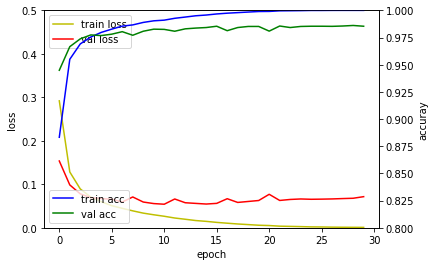

10000/10000 [==============================] - 0s 22us/step
## evaluation loss and_metrics ##
[0.054729164479959944, 0.9856]


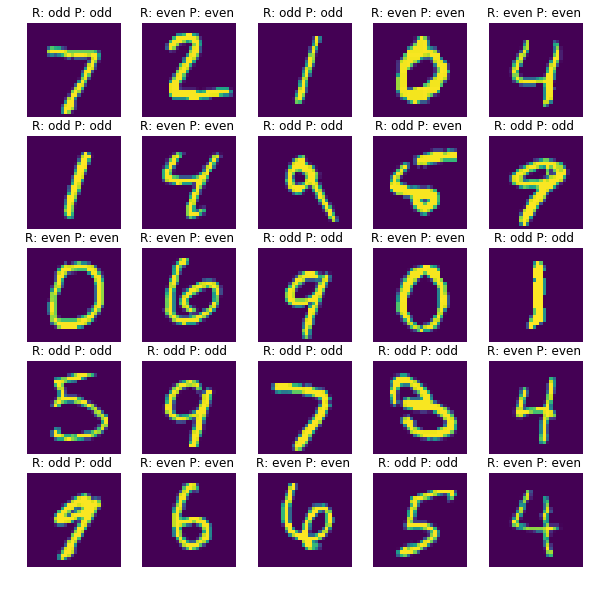

In [1]:
# 다층퍼셉트론 신경망 모델

# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()

Using TensorFlow backend.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/30





50000/50000 [==============================] - 6s 116us/step - loss: 0.3187 - acc: 0.8656 - val_loss: 0.1604 - val_acc: 0.9463
Epoch 2/30
50000/50000 [==============================] - 4s 88us/step - loss: 0.1334 - acc: 0.9516 - val_loss: 0.0854 - val_acc: 0.9705
Epoch 3/30
50000/50000 [==============================] - 5s 106us/step - loss: 0.0880 - acc: 0.9692 - val_loss: 0.0787 - val_acc: 0.9715
Epoch 4/30
50000/50000 [==============================] - 5s 94us/step - loss: 0.0692 - acc: 0.9764 - val_loss: 0.0641 - val_acc: 0.9778
Epoch 5/30
50000/50000 [==============================] - 5s 91us/step - loss: 0.0585 - acc: 0.9792 - val_loss: 0.0594 - val_acc: 0.9786
Epoch 6/30
50000/50000 [==============================] - 6s 117us/step - loss: 0.0516 - acc: 0.9817 - val_loss: 0.0469 - val_acc: 0.9838
Epoch 7/30
50000/

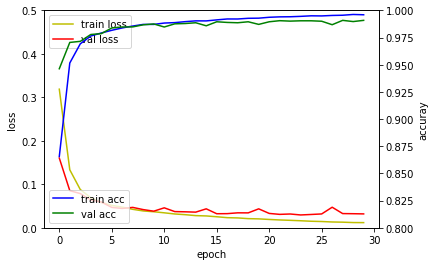

10000/10000 [==============================] - 0s 39us/step
## evaluation loss and_metrics ##
[0.021324350186937954, 0.9934]


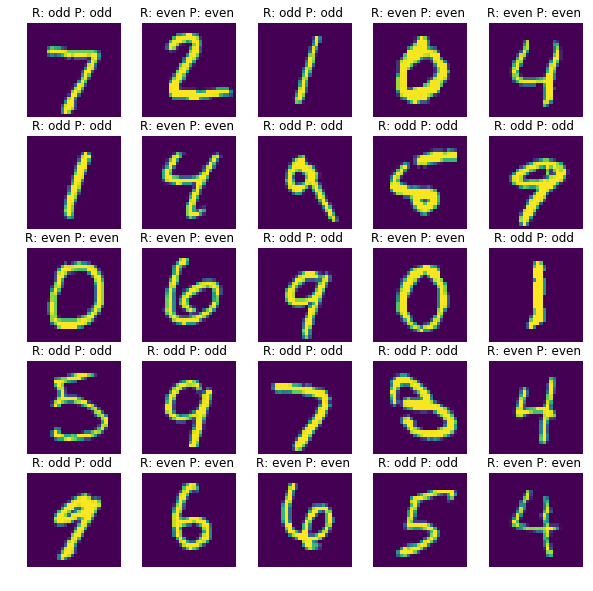

In [1]:
# 컨볼루션 신경망 모델

# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 158us/step - loss: 0.4115 - acc: 0.8039 - val_loss: 0.1672 - val_acc: 0.9392
Epoch 2/30
50000/50000 [==============================] - 8s 154us/step - loss: 0.1828 - acc: 0.9291 - val_loss: 0.0877 - val_acc: 0.9691
Epoch 3/30
50000/50000 [==============================] - 7s 149us/step - loss: 0.1201 - acc: 0.9565 - val_loss: 0.0654 - val_acc: 0.9770
Epoch 4/30
50000/50000 [==============================] - 7s 137us/step - loss: 0.0964 - acc: 0.9656 - val_loss: 0.0535 - val_acc: 0.9814
Epoch 5/30
50000/50000 [==============================] - 7s 136us/step - loss: 0.0809 - acc: 0.9707 - val_loss: 0.0479 - val_acc: 0.9829
Epoch 6/30
50000/50000 [==============================] - 7s 145us/step - loss: 0.0716 - acc: 0.9747 - val_loss: 0.0416 - val_acc: 0.9851
Epoch 

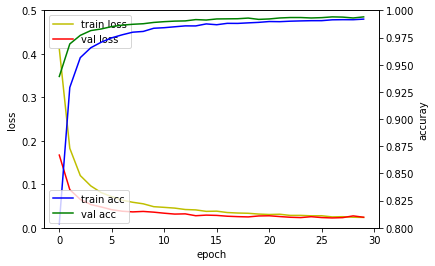

10000/10000 [==============================] - 1s 54us/step
## evaluation loss and_metrics ##
[0.015233487687571323, 0.9947]


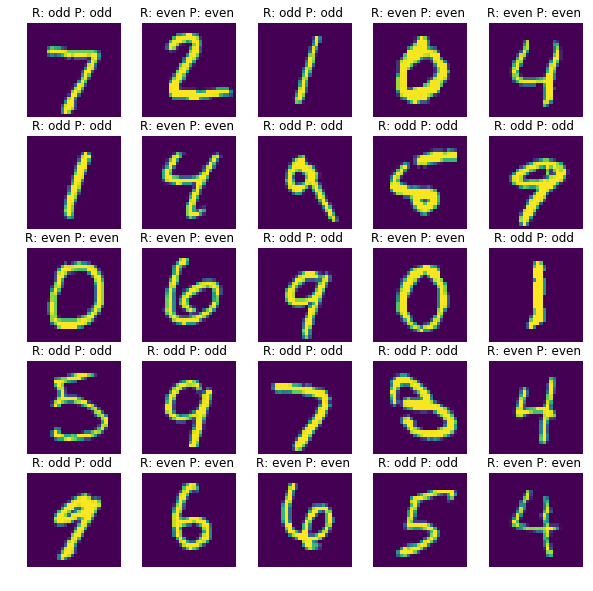

In [2]:
# 깊은 컨볼루션 신경망 모델

# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()

### 5. 학습결과 비교
다층퍼셉트론 신경망 모델은 훈련정확도는 검증 손실값은 높아지고 과적합이 발생하였다.<br>
컨볼루션 신경망 모델에 비해 높은 성능이 보이고 있다.<br>
깊은 컨볼루션 신경망 모델은 dropout 레이어 덕분에 과적합이 발생하지 않고 검증 손실값이 지속적으로 떨어지고 있는 것을 알 수 있다.